# Lezione 1 - Exploratory Data Analysis on Haberman's Cancer Survival
*Lorenzo Andreoli, Corso Data Science, Febbraio 2020*

*Qui trovate l'articolo originale in inglese di [Deepthi A R](https://www.linkedin.com/posts/sahil-deo_ai-xai-algorithmic-activity-6628183838155657216-FXq1)*

## Che cosa è una *Exploratory Data Analysis*?


L'analisi esplorativa dei dati o ***Exploratory Data Analysis*** è un termine coniato da [John Turkey](https://it.wikipedia.org/wiki/John_Wilder_Tukey), un importante statistico americano del XX secolo, per definire un approcio all'analisi di insiemi di dati per riassumere le loro caratteristiche principali, spesso utilizzando metodi visivi (***data visualization***).

Principalmente l'EDA serve a vedere ciò che i dati possono dirci al di là del compito formale di modellazione o di verifica delle ipotesi.

È sempre una buona idea esplorare un insieme di dati con tecniche esplorative multiple, soprattutto quando possono essere fatte insieme per il confronto. L'obiettivo dell'analisi esplorativa dei dati è quello di ottenere la fiducia nei propri dati al fine di assicurarsi l'accuratezza necessaria per sviluppare modelli d'analisi più complessi (es: machine learning). Un altro vantaggio collaterale di EDA è quello di perfezionare la selezione delle variabili delle caratteristiche che saranno utilizzate in seguito per l'apprendimento automatico.



## Perché è importante fare l'analisi esplorativa?

Cercare di creari modelli d'analisi complessi senza avere studiato e capito bene il dataset è un grave errore con molte implicazioni, tra cui la generazione di modelli imprecisi, la generazione di modelli accurati ma sui dati sbagliati, la mancata creazione dei giusti tipi di variabili nella preparazione dei dati, e l'uso inefficiente delle risorse a causa del fatto di rendersi conto solo dopo aver generato modelli che forse i dati sono distorti, o hanno valori erratici, o hanno troppi valori mancanti, o scoprire che alcuni valori sono incoerenti.

# Il Dataset

## Parte 1: Capire il Dataset

**Titolo:** Dati sulla sopravvivenza di Haberman

**Descrizione:** Il dataset contiene casi tratti da uno studio condotto tra il 1958 e il 1970 al Billings Hospital dell'Università di Chicago sulla sopravvivenza delle pazienti che si erano sottoposte ad un intervento chirurgico per il cancro al seno.

**Informazioni sugli attributi:**
- Età della paziente al momento dell'operazione (numerica)
- Anno di funzionamento del paziente (anno - 1900, numerico)
- Numero di nodi ascellari positivi rilevati (numerico)

**Stato di sopravvivenza (attributo di classe) :**
- 1 = il paziente è sopravvissuto per 5 anni o più
- 2 = il paziente è morto entro 5 anni

## Parte 2: Importazione di librerie e caricamento del file

Per prima cosa bisogna assicuarsi di caricare le ***"libraries"*** che ci permettono di analizzare il dataset 


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#reading the csv file
haber = pd.read_csv('haberman.csv', header=None, names=['age', 'year', 'nodes', 'status'])
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Parte 3: Capire i dati

In [84]:
#prints the number of rows and number of columns
haber.shape

(306, 4)

In [85]:
#printing the columns
haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [86]:
print(haber.info())
#brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


### Quali osservazioni possiamo concludere?

1. Ci sono valori NA/NULL 
2. Che tipologia di dati sono le colonne
3. Cosa vuole dire la variable **status**?

#### Che cosa fa il seguente codice?

In [87]:
haber['status'] = haber['status'].map({1:"Yes", 2:"No"})
haber.head() 


,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [88]:
haber.describe()
#describes the dataset


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Count** : Numero totale di valori presenti nelle rispettive colonne. <br/>
**Media**: Media di tutti i valori presenti nelle rispettive colonne. <br/>
**Std**: Deviazione standard dei valori presenti nelle rispettive colonne. <br/>
**Min**: Il valore minimo presente nella colonna. <br/>
**25%**: Dà il valore del 25° percentile. <br/>
**50%**: Dà il valore del 50° percentile. <br/>
**75%**: Dà il valore del 75° percentile. <br/>
**Max**: dà il valore massimo nella colonna.<br/>

In [89]:
haber['status'].value_counts()
#gives each count of the status type

Yes    225
No      81
Name: status, dtype: int64

### Cosa vuole dire 225 Yes e 81 No?

In [90]:
status_yes = haber[haber['status']=='Yes']
status_yes.describe()
#status_yes dataframe stores all the records where status is yes

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [91]:
status_no = haber[haber['status']=='No']
status_no.describe()
#status_no dataframe stores all the records where status is no

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Quali conclusioni puoi trarre da queste due tabelle?

## Parte 4: Analisi univariata

Lo scopo principale dell'analisi univariata è quello di descrivere, riassumere e trovare i modelli nella singola caratteristica.

#### Probability Density Function 

Probability Density Function (PDF) è la probabilità che la variabile prenda un valore x. (una versione smussata dell'istogramma)

Qui l'altezza della barra indica la percentuale di punti dati sotto il gruppo corrispondente

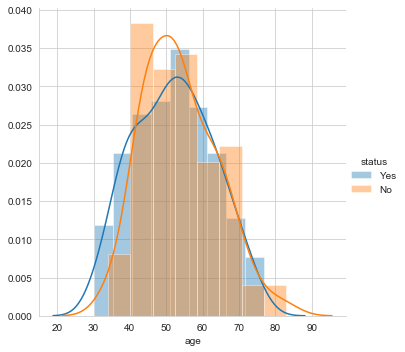

In [92]:
sns.FacetGrid(haber,hue='status',height = 5)\
 .map(sns.distplot,'age')\
 . add_legend();
plt.show()

#### Che cosa si può osservare da questo grafico? 
1. Che cosa vuole rappresentano le sovrapposizioni dei grafici? <br/>
2. Ci sono differenze tra i diversi gruppi d'età? <br/>


In [93]:
# aggiungi qui il codice necessario per genere un grafico simile a quello di sopra ma con 'year' sull'asse delle X

In [94]:
# aggiungi qui il codice necessario per genere un grafico simile a quello di sopra ma con 'nodes' sull'asse delle X

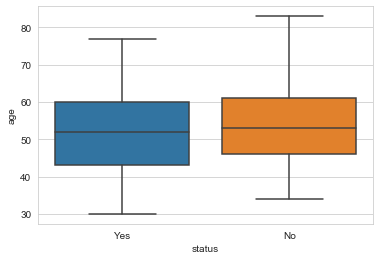

In [95]:
sns.boxplot(x='status',y='age',data=haber)
plt.show()
# aggiungi due boxplot, entrambi con la X = 'status' ma la Y = 'year' e 'nodes' 

In [96]:
# come fai a disegnare un **violinplot* al posto del boxplot? 
#(x='status',y='age',data = haber,height = 10)
plt.show()
#(x='status',y='year',data = haber,height = 10)
plt.show()
#(x='status',y='nodes',data = haber,height = 10)
plt.show()

## Parte 5: Analisi bi-variata

### Scatter plot / Diagramma di dispersione 

Un **diagramma di dispersione** è una visualizzazione bidimensionale dei dati che utilizza dei punti per rappresentare i valori ottenuti per due diverse variabili - una tracciata lungo l'asse delle x e l'altra tracciata lungo l'asse delle y.

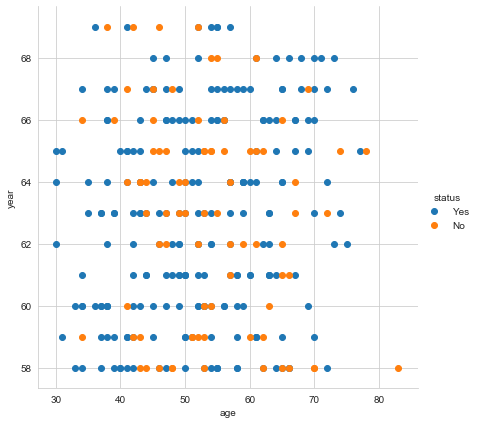

In [97]:
sns.set_style('whitegrid')
sns.FacetGrid(haber, hue = 'status' , height = 6)\
 .map(plt.scatter,'age','year')\
 .add_legend()
plt.show()

#### Quali conclusione potete formulare guardando a questo grafico?

### Pair Plots

In [98]:
# completa il codice  
sns.set_style()
sns.pairplot( height = 5)
plt.show()

TypeError: pairplot() missing 1 required positional argument: 'data'

# Congratulazioni hai finito il tuo primo EDA!!!